# Designing ML - Week 4!
michelle.carney@berkeley.edu

This is a jupyter notebook on clustering meetup.com data! In this notebook, I have used the location and group information to cluster the members into 6 clusters - but it is up to you to figure out what they mean!

In [0]:
#these are all of the libraries i'll be using - and I load the groups.csv data
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
df = pd.read_csv('groups.csv')

# Data Step
This step we're going to look at our dataframes and become familiar with what's in them.
This data was collected via meetup.com API in Dec 2017

In [0]:
#this is what the groups.csv looks like as a dataframe - it is about the groups
df.head()

,group_id,category_id,category.name,category.shortname,city_id,city,country,created,description,group_photo.base_url,...,organizer.photo.photo_link,organizer.photo.thumb_link,organizer.photo.type,rating,state,timezone,urlname,utc_offset,visibility,who
0,6388,14,health/wellbeing,health-wellbeing,10001,New York,US,2002-11-21 16:50:46,Those who practice or hold a strong interest i...,https://secure.meetupstatic.com,...,https://secure.meetupstatic.com/photos/member/...,https://secure.meetupstatic.com/photos/member/...,member,4.39,NY,US/Eastern,alternative-health-nyc,-14400,public,Explorers of Health
1,6510,4,community/environment,community-environment,10001,New York,US,2003-05-20 14:48:54,The New York Alternative Energy Meetupis for t...,https://secure.meetupstatic.com,...,https://secure.meetupstatic.com/photos/member/...,https://secure.meetupstatic.com/photos/member/...,member,4.31,NY,US/Eastern,alternative-energy-meetup,-14400,public,Clean Energy Supporters
2,8458,26,pets/animals,pets-animals,10001,New York,US,2004-03-27 09:55:41,not_found,https://secure.meetupstatic.com,...,https://secure.meetupstatic.com/photos/member/...,https://secure.meetupstatic.com/photos/member/...,member,4.84,NY,US/Eastern,Animals,-14400,public,Animal Voices
3,8940,29,sci-fi/fantasy,sci-fi-fantasy,10001,New York,US,2002-11-16 04:49:16,Welcome to the The New York City Anime Meetup ...,https://secure.meetupstatic.com,...,https://secure.meetupstatic.com/photos/member/...,https://secure.meetupstatic.com/photos/member/...,member,4.46,NY,US/Eastern,NYC-Anime,-14400,public,Anime Fans
4,10104,26,pets/animals,pets-animals,10001,New York,US,2003-10-22 21:39:49,"We welcome those who support pits, even if you...",https://secure.meetupstatic.com,...,https://secure.meetupstatic.com/photos/member/...,https://secure.meetupstatic.com/photos/member/...,member,4.09,NY,US/Eastern,NYC-Pitbull,-14400,public_limited,"NYC Pits & People, Dog Lovers"


In [0]:
#this is the df about the members
df2 = pd.read_csv('members.csv', encoding = "ISO-8859-1")

In [0]:
df2.head()

,member_id,bio,city,country,hometown,joined,lat,link,lon,member_name,state,member_status,visited,group_id
0,3,not_found,New York,us,"New York, NY",2007-05-01 22:04:37,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2009-09-18 18:32:23,490552
1,3,not_found,New York,us,"New York, NY",2011-01-23 14:13:17,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-03-20 01:02:11,1474611
2,3,"Hi, I'm Matt. I'm an entrepreneur who has star...",New York,us,"New York, NY",2010-12-30 18:47:34,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-01-18 20:37:23,1490492
3,3,"Hi, I'm Matt. I'm an entrepreneur who has star...",New York,us,"New York, NY",2011-01-03 14:45:21,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-07-23 03:42:28,1515830
4,3,"Hi, I'm Matt. I'm an entrepreneur who has star...",New York,us,"New York, NY",2010-12-30 18:34:50,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-06-13 18:33:23,1574965


## Data Cleaning Phase
In this phase, we'll sample a % of the data, and then use "one hot" encoding to turn string features into numbers for our mathematical models! (read more here: http://www.insightsbot.com/blog/zuyVu/python-one-hot-encoding-with-pandas-made-simple)

In [0]:
# I am sampling to 50,000 random samples from the dataframe since it is just SOOO big! This will help my code run faster
df2_sample = df2.sample(n=50000)

In [0]:
#let's explore the df by member id and the first record number of each - what are the features we want to use?
df2_sample.groupby(['member_id']).first()

,bio,city,country,hometown,joined,lat,link,lon,member_name,state,member_status,visited,group_id
member_id,,,,,,,,,,,,,
3,not_found,New York,us,"New York, NY",2007-05-01 22:04:37,40.72,http://www.meetup.com/members/3,-74.00,Matt Meeker,NY,active,2009-09-18 18:32:23,490552
6,Community organizer,New York,us,not_found,2013-09-11 00:42:06,40.73,http://www.meetup.com/members/6,-74.00,Scott Heiferman,NY,active,2014-09-20 12:28:38,113455
36,not_found,New York,us,New York,2010-07-27 18:44:24,40.80,http://www.meetup.com/members/36,-73.97,Mark Hurst,NY,active,2013-06-26 13:31:37,703741
65,I work on Go at Google.,San Francisco,us,Portland,2012-03-20 05:29:10,37.74,http://www.meetup.com/members/65,-122.44,Brad Fitzpatrick,CA,active,2017-06-03 06:22:28,2701562
82,I write code for a living and occasionally dab...,San Francisco,us,NY / SF,2014-05-16 23:24:44,37.78,http://www.meetup.com/members/82,-122.42,Maggie Nelson,CA,active,2014-05-16 23:24:44,1811614
117,not_found,New York,us,not_found,2002-06-16 17:10:32,40.75,http://www.meetup.com/members/117,-73.99,DaveVockell,NY,active,2004-08-05 02:48:10,131291
150,not_found,New York,us,New York,2008-05-12 20:29:12,40.71,http://www.meetup.com/members/150,-74.02,Rex Sorgatz,NY,active,2017-01-06 21:16:26,272793
176,not_found,San Francisco,us,not_found,2006-04-01 20:36:27,37.79,http://www.meetup.com/members/176,-122.40,Cal Henderson,CA,active,2014-05-12 21:18:22,120903
210,Chris Kramer - I've been running affiliate pro...,New York,us,not_found,2008-03-12 00:11:27,40.74,http://www.meetup.com/members/210,-74.00,chris kramer,NY,active,2013-09-28 11:38:07,255307


In [0]:
#One feature I want to use is the GROUP ID - one thing that we can do is "get dummies" or "one-hot encoding" to 
#turn string variables into numbers! look at it below
df2_sample_dummies = pd.get_dummies(df2_sample['group_id'], prefix = 'group_id')

In [0]:
# df2_sample_dummies_first = df2_sample_dummies.groupby(['member_id']).first()

In [0]:
#this is what it looks like to have "dummies" or one-hot encoded variables! 
#http://www.insightsbot.com/blog/zuyVu/python-one-hot-encoding-with-pandas-made-simple 
df2_dummies.head()

,group_id_6388,group_id_6510,group_id_8458,group_id_8940,group_id_12542,group_id_12907,group_id_14573,group_id_15324,group_id_16620,group_id_17921,...,group_id_26371769,group_id_26372763,group_id_26373602,group_id_26374579,group_id_26374655,group_id_26375445,group_id_26376543,group_id_26377698,group_id_26378067,group_id_26378128
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
#Let's combine it back to our original dataframe 
df2_sample_dummies_concat = pd.concat([df2_sample, df2_sample_dummies], axis=1)

In [0]:
df2_sample_dummies_concat.head()

,member_id,bio,city,country,hometown,joined,lat,link,lon,member_name,...,group_id_26344309,group_id_26347789,group_id_26350181,group_id_26350972,group_id_26352410,group_id_26355546,group_id_26361954,group_id_26365189,group_id_26371769,group_id_26372763
5715312,234880949,not_found,San Francisco,us,not_found,2017-08-29 18:43:26,37.78,http://www.meetup.com/members/234880949,-122.42,Justine Jennings,...,0,0,0,0,0,0,0,0,0,0
49395,1831033,not_found,San Francisco,us,not_found,2011-04-29 05:36:18,37.77,http://www.meetup.com/members/1831033,-122.40,Ines Sombra,...,0,0,0,0,0,0,0,0,0,0
1177488,15422371,looking forward to playing more soccer,Chicago,us,Chicago,2013-02-01 05:41:47,41.92,http://www.meetup.com/members/15422371,-87.70,Enrique,...,0,0,0,0,0,0,0,0,0,0
2243458,101653742,not_found,New York,us,not_found,2013-07-10 18:53:45,40.76,http://www.meetup.com/members/101653742,-73.99,M,...,0,0,0,0,0,0,0,0,0,0
5738270,235589417,not_found,New York,us,not_found,2017-09-08 02:03:22,40.80,http://www.meetup.com/members/235589417,-73.97,Yuanyuan (Yoannie) Lei,...,0,0,0,0,0,0,0,0,0,0


In [0]:
#let's repeat the same process for the "cities" feature
df2_sample_dummies_cities = pd.get_dummies(df2_sample_dummies_concat['city'], prefix = 'cities_')
df2_sample_dummies_concat_cities2 = pd.concat([df2_sample_dummies_concat, df2_sample_dummies_cities], axis=1)

In [0]:
df2_sample_dummies_concat_cities2.head()

,member_id,bio,city,country,hometown,joined,lat,link,lon,member_name,...,cities__Chicago,cities__Chicago Heights,cities__Chicago Ridge,cities__East Chicago,cities__New York,cities__North Chicago,cities__San Francisco,cities__South San Francisco,cities__West Chicago,cities__West New York
5715312,234880949,not_found,San Francisco,us,not_found,2017-08-29 18:43:26,37.78,http://www.meetup.com/members/234880949,-122.42,Justine Jennings,...,0,0,0,0,0,0,1,0,0,0
49395,1831033,not_found,San Francisco,us,not_found,2011-04-29 05:36:18,37.77,http://www.meetup.com/members/1831033,-122.40,Ines Sombra,...,0,0,0,0,0,0,1,0,0,0
1177488,15422371,looking forward to playing more soccer,Chicago,us,Chicago,2013-02-01 05:41:47,41.92,http://www.meetup.com/members/15422371,-87.70,Enrique,...,1,0,0,0,0,0,0,0,0,0
2243458,101653742,not_found,New York,us,not_found,2013-07-10 18:53:45,40.76,http://www.meetup.com/members/101653742,-73.99,M,...,0,0,0,0,1,0,0,0,0,0
5738270,235589417,not_found,New York,us,not_found,2017-09-08 02:03:22,40.80,http://www.meetup.com/members/235589417,-73.97,Yuanyuan (Yoannie) Lei,...,0,0,0,0,1,0,0,0,0,0


In [0]:
#write it to a CSV before your kernel dies! this could be helpful if you want to use the same sample again in the future
# df2_sample_dummies_concat_cities2.to_csv('members2.csv')

In [0]:
#print(list(df2_sample_dummies_concat_cities2.columns.values))

## Training the model
I am deciding that we use groupIDs and Cities as our main features to train the model - and since we want the data itself to group and tell us what the major groups are - we are going to use a technique called "clustering" (or k-means clustering, where k= the number of clusters). I don't know in advance what the best number of clusters will be, so I will try a bunch of different k (k= 2,4,6,8) and then see how well our clusters are performing. See below :)

In [0]:
df2_sample_dummies_concat_cities2_train = df2_sample_dummies_concat_cities2.loc[:, 'group_id_6388':'cities__West New York']
df2_sample_dummies_concat_cities2_train.head()

,group_id_6388,group_id_6510,group_id_8458,group_id_8940,group_id_12542,group_id_12907,group_id_14573,group_id_15324,group_id_17921,group_id_18843,...,cities__Chicago,cities__Chicago Heights,cities__Chicago Ridge,cities__East Chicago,cities__New York,cities__North Chicago,cities__San Francisco,cities__South San Francisco,cities__West Chicago,cities__West New York
5715312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1177488,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2243458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5738270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [0]:
#k = 8 training model
km = KMeans(n_clusters=8)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
silhouette_k8 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:50000], clusters[0:50000])

CPU times: user 6min 12s, sys: 2min 54s, total: 9min 7s
Wall time: 10min 23s


In [0]:
# km = KMeans(n_clusters=7)
# %time km.fit(df2_sample_dummies_concat_cities2_train)
# clusters = km.labels_.tolist()
# silhouette_k7 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:10000], clusters[0:10000])

In [0]:
#k=6 training model
km = KMeans(n_clusters=6)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
silhouette_k6 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:50000], clusters[0:50000])

CPU times: user 5min 21s, sys: 2min 37s, total: 7min 59s
Wall time: 8min 54s


In [0]:
# km = KMeans(n_clusters=5)
# %time km.fit(df2_sample_dummies_concat_cities2_train)
# clusters = km.labels_.tolist()
# silhouette_k5 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:10000], clusters[0:10000])

In [0]:
# k = 4 training model
km = KMeans(n_clusters=4)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
silhouette_k4 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:50000], clusters[0:50000])

CPU times: user 4min 34s, sys: 2min 21s, total: 6min 55s
Wall time: 8min


In [0]:
# km = KMeans(n_clusters=3)
# %time km.fit(df2_sample_dummies_concat_cities2_train)
# clusters = km.labels_.tolist()
# silhouette_k3 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:10000], clusters[0:10000])

In [0]:
# k = 2 training model
km = KMeans(n_clusters=2)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
silhouette_k2 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:50000], clusters[0:50000])

CPU times: user 3min 51s, sys: 2min 43s, total: 6min 34s
Wall time: 8min 23s


## Model Evaluation
Ok now that we've trained 4 models on different size clusters (different k) and we calculated a silhouette coefficient - The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

We can plot the number of clusters by the silhouette score and use the elbow method (visually looking at the data to see where's an "elbow") to see which cluster does the best.  The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

http://www.awesomestats.in/python-cluster-validation/

In [0]:
# silhouette = [silhouette_k2, silhouette_k3, silhouette_k4, silhouette_k5, silhouette_k6, silhouette_k7, silhouette_k8]
# count_k = [2, 3, 4, 5, 6, 7, 8]

silhouette = [silhouette_k2, silhouette_k4, silhouette_k6, silhouette_k8]
count_k = [2, 4, 6, 8]

count_silhouette = list(zip(count_k, silhouette))
print(count_silhouette)

[(2, 0.20347691177588109), (4, 0.23169483895092327), (6, 0.075606478197469767), (8, 0.0028336940867501044)]


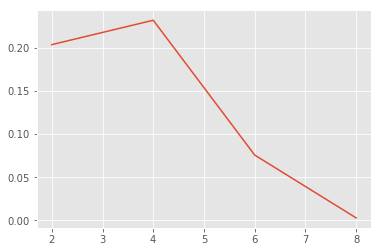

In [0]:
plt.plot(*zip(*count_silhouette))

### From this plot - I am going to go with k=6 being the "elbow" of the data - it is doing the best in terms of clustering and not significantly better than k=8 clusters. 

In [0]:
km = KMeans(n_clusters=6)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters6 = km.labels_.tolist()
silhouette_k6 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:50000], clusters[0:50000])

CPU times: user 5min 8s, sys: 2min 39s, total: 7min 47s
Wall time: 8min 40s


In [0]:
#Let's assign these clusters back to the original df and take a look!
df2_sample_dummies_concat_cities2_train.loc[:, "cluster_number"] = clusters6

In [0]:
df2_sample_dummies_concat_cities2_train.head()

,group_id_6388,group_id_6510,group_id_8458,group_id_8940,group_id_12542,group_id_12907,group_id_14573,group_id_15324,group_id_17921,group_id_18843,...,cities__Chicago Heights,cities__Chicago Ridge,cities__East Chicago,cities__New York,cities__North Chicago,cities__San Francisco,cities__South San Francisco,cities__West Chicago,cities__West New York,cluster_number
5715312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
49395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1177488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2243458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5738270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [0]:
#it is important to investigate how many samples are in each of your clusters - we can seee here that the first 3 
#clusters have WAAAY more samples than the last 3! So, when we plot our visualizations, let's see what makes them
#so different!
df2_sample_dummies_concat_cities2_train["cluster_number"].value_counts()

0    27013
1    12500
2    10266
3      106
4       91
5       24
Name: cluster_number, dtype: int64

## Model Output
Now that we've decided on k=6 clusters, let's assign the cluster labels back to the original data, and make it interpretable!

In [0]:
df2_sample.head()

,member_id,bio,city,country,hometown,joined,lat,link,lon,member_name,state,member_status,visited,group_id
5715312,234880949,not_found,San Francisco,us,not_found,2017-08-29 18:43:26,37.78,http://www.meetup.com/members/234880949,-122.42,Justine Jennings,CA,active,2017-09-05 17:34:49,4260482
49395,1831033,not_found,San Francisco,us,not_found,2011-04-29 05:36:18,37.77,http://www.meetup.com/members/1831033,-122.40,Ines Sombra,CA,active,2015-11-29 04:23:38,1811614
1177488,15422371,looking forward to playing more soccer,Chicago,us,Chicago,2013-02-01 05:41:47,41.92,http://www.meetup.com/members/15422371,-87.70,Enrique,IL,active,2017-09-06 23:02:43,565564
2243458,101653742,not_found,New York,us,not_found,2013-07-10 18:53:45,40.76,http://www.meetup.com/members/101653742,-73.99,M,NY,active,2016-11-07 20:56:57,2662432
5738270,235589417,not_found,New York,us,not_found,2017-09-08 02:03:22,40.80,http://www.meetup.com/members/235589417,-73.97,Yuanyuan (Yoannie) Lei,NY,active,2017-09-08 02:03:22,8639012


In [0]:
df2_sample_dummies_concat_cities2_train.head()

,group_id_6388,group_id_6510,group_id_8458,group_id_8940,group_id_12542,group_id_12907,group_id_14573,group_id_15324,group_id_17921,group_id_18843,...,cities__Chicago Heights,cities__Chicago Ridge,cities__East Chicago,cities__New York,cities__North Chicago,cities__San Francisco,cities__South San Francisco,cities__West Chicago,cities__West New York,cluster_number
5715312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
49395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1177488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2243458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5738270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [0]:
df2_sample.loc[:, "cluster_number"] = clusters6

In [0]:
df2_sample_merged = df2_sample.merge(df[['group_id', 'category.shortname']], on=['group_id'])

## Tadah! We have a merged dataframe of members, clustered by their city and groups they're interested in, merged on what the group categories are (from the original groups df) and we can now export this and explore!

In [0]:
df2_sample_merged.head()

,member_id,bio,city,country,hometown,joined,lat,link,lon,member_name,state,member_status,visited,group_id,cluster_number,category.shortname
0,234880949,not_found,San Francisco,us,not_found,2017-08-29 18:43:26,37.78,http://www.meetup.com/members/234880949,-122.42,Justine Jennings,CA,active,2017-09-05 17:34:49,4260482,1,socializing
1,204944223,not_found,San Francisco,us,not_found,2016-05-11 14:15:36,37.76,http://www.meetup.com/members/204944223,-122.48,Leslie W,CA,active,2017-05-05 23:19:38,4260482,1,socializing
2,235052959,not_found,San Francisco,us,not_found,2017-08-28 03:03:10,37.72,http://www.meetup.com/members/235052959,-122.44,Lauren Waterman,CA,active,2017-08-28 03:03:10,4260482,1,socializing
3,118747522,Love walking!,San Francisco,us,not_found,2014-06-05 01:12:03,37.78,http://www.meetup.com/members/118747522,-122.42,Hannah K,CA,active,2014-11-30 21:56:50,4260482,1,socializing
4,81700682,not_found,San Francisco,us,not_found,2015-05-23 21:43:23,37.76,http://www.meetup.com/members/81700682,-122.44,Charlotte,CA,active,2017-09-24 06:09:25,4260482,1,socializing


In [0]:
# This is the final file you will be using for this assignment to explore :) 
df2_sample_merged.to_csv('members_cluster_group.csv')